In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# generate some normally distributed random data with numpy
apple_weight = np.random.normal(125,12,1000)
apple_volume = np.random.normal(175,17,1000)
orange_weight = np.random.normal(215,22,1000)
orange_volume = np.random.normal(218,22,1000)
a = {"Weight": apple_weight,"Volume": apple_volume, "Type": np.full(1000,"Apple")}
o = {"Weight": orange_weight,"Volume": orange_volume, "Type": np.full(1000,"Orange")}

In [11]:
# create a DataFrame with the numpy arrays
fruit = pd.DataFrame(a).append(pd.DataFrame(o))

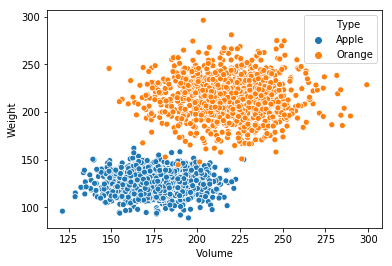

In [12]:
# plot the data to visualize the distribution
sp = sb.scatterplot(x="Volume",y="Weight",data=fruit,hue="Type")

In [13]:
# train, test, split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(fruit.drop("Type",axis=1),
                                                 fruit["Type"],
                                                 test_size=0.3)

In [14]:
# fit the training data using KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
# use the test data to predict results
pred = knn.predict(x_test)

In [16]:
# generate a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       286
      Orange       1.00      1.00      1.00       314

   micro avg       1.00      1.00      1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [17]:
# fit the data again using k=5 this time
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       286
      Orange       1.00      1.00      1.00       314

   micro avg       1.00      1.00      1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

